# Risk, Random Numbers and Monte Carlo Method

We can model risk in finance by random numbers. 

For example, we don't know the exact return of a risky asset ex ante. We can model the return of the risky asset as random numbers.

To find the closed form solution could be a daunting task even the model involving risk is very simple. 

Monte Carlo method provides a tractable way to explore the influence of risk in our model.

By repeatedly sampling, we can obtain the numerical results.

In [1]:
# We can always import the necessary libraries at the beginning.
# Every time you restart this notebook, you may get started from this cell.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas_datareader.data as web


# 1. Random Numbers

To model risk and to use Monte Carlo method, we need to generate random numbers.

The library, `random`, provides various random number generators.

We can also use `NumPy` to generate random numbers.

Let's play with random numbers first.


## 1.1 Basic Idea: Distribution and Parameters

Try to run the following cell several times. What do you find?

In [2]:
# Here we generate a random number from [0,1) by random

random.random()

0.33314814939469783

In [3]:
# Here we generate a random number from [0,1) by NumPy

np.random.rand()

0.8053311165285467

You may find that the result of the cell above always changes.

We don't know what the next result will be. That's why we call it "random numbers".

The distribution matters. We can specify the distribution we need.

In [4]:
# Here we specify the parameters of the uniform distribution by random
# random.uniform(a,b) gives a random number follows the uniform distribution 
# the result is a number between a and b.

random.uniform(1,2)

1.776686906256163

In [5]:
# Here we specify the parameters of the uniform distribution by NumPy
# random.uniform(a,b) gives a random number follows the uniform distribution 
# the result is a number between a and b.

np.random.uniform(1,2)

1.3866199031264375

You can not only change the parameters, but also specify a different distribution.

In [6]:
# random.gauss(mu, sigma) gives a random number follows the normal distribution by random
# the parameter mu is the expectation (or expected value, mean, average)
# the parameter sigma is the standard deviation (or the square root of the variance)

random.gauss(0,1)

0.7620702069811464

In [7]:
# random.gauss(mu, sigma) gives a random number follows the normal distribution by NumPy
# the parameter mu is the expectation (or expected value, mean, average)
# the parameter sigma is the standard deviation (or the square root of the variance)

np.random.normal(0,1)

-0.15960966162856322

## 1.2 Random Numbers

We already know how to generate one random number.

But in practice, we may need many random numbers.

How to generate, say, 100 random numbers?

In the following examples, we use `NumPy` only.

In [8]:
# np.random.normal(expectation, standard deviation, size)

np.random.normal(10, 10, 100)

array([  9.51715387,  16.39117533,   8.88472683,   6.07531624,
         9.14761737,  23.75807919,   6.97417496,  10.3788335 ,
         6.45125605,  20.4358739 ,   5.19956294,  28.52417757,
        -0.46526238,   1.11316543,   1.84373798,   1.45310509,
         2.94579496,  15.99427271,  14.08365607,  13.3311968 ,
        14.62705006,  -9.7396752 ,  22.57287457,  23.88140329,
         5.54472901,  26.18302757,  -2.17094988,  -3.15579851,
        20.28457017,  17.93653872,  -8.72115202,  -3.56258329,
         9.46068418,   2.07626338,   7.14010635,  13.8447608 ,
        18.75491592,  11.54221365,  22.06704233,   8.41766316,
        -4.12290903,  12.44238812,  26.89269536,  30.976572  ,
         8.20732829,  20.41140046,  12.73234215,  23.22336094,
        -0.82926535,   3.72528931,   5.60068039,  17.18282643,
         2.96231215,  -1.38197015,  17.07039892,   4.65702908,
        14.33430549, -16.41074441,  19.6373709 ,  27.75593297,
        22.61027957,   6.81490799,  32.32987181,  -2.13

In [9]:
# For standard normal distribution, N(0,1)
# Just specify the size is enough
# np.random.standard_normal(size)

np.random.standard_normal(100)

array([ -4.02042578e-01,   6.16157711e-01,   2.03848958e+00,
        -1.31909286e+00,  -1.85470945e+00,  -2.06929125e+00,
         9.51970798e-01,  -4.78894034e-01,   4.67492959e-01,
         1.35744599e-01,   2.17721490e-01,   1.52164398e-01,
        -2.10783011e-01,   3.42421817e-01,  -1.77909365e+00,
         1.21671914e+00,   1.60827458e+00,  -7.32156721e-01,
        -5.79736921e-01,   6.73716416e-01,   1.25270303e+00,
         2.31166308e+00,  -1.41681588e+00,   6.32504617e-02,
         6.24889465e-01,   4.51086430e-01,  -1.35181108e+00,
        -4.57519816e-01,  -1.62088413e+00,   4.27193352e-01,
         3.54690897e-01,   9.56041906e-01,   5.83855785e-01,
         1.26223281e+00,   7.05491296e-01,  -7.84422607e-01,
        -1.90868419e-03,  -1.20240044e+00,   2.12893366e-01,
         1.09969820e+00,   4.57241920e-01,   2.11162926e-01,
         3.06129168e-01,  -4.55084866e-01,  -7.16544133e-01,
        -3.55140335e-01,  -2.67138469e-02,   3.07411866e-01,
        -1.36127971e+00,

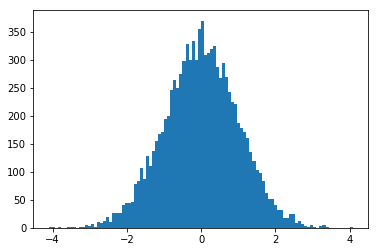

In [10]:
# histogram is a good way to show the distribution

# first, generate the random numbers
x = np.random.standard_normal(10000)

# second, plot the histogram with bins = 100
# the more bins you got, the smoothier the histogram could be
plt.hist(x,bins=100)
plt.show()

## 1.3 Advanced: Multivariate Normal Distribution

In previous examples, we have only one random variable in each distribution.

We can also apply the multivariate distribution for multiple random variables.

Here we take the multivariate normal distribution as an example. You can also try other multivariate distributions.

Suppose we have two random variables, $x$ and $y$, and the expectations of $x$ and $y$ are $\mu_x=0$ and $\mu_y=0$, respectively.

Let the variance of $x$ and $y$ be $\sigma^2_x=1$ and $\sigma^2_y=1$, respectively.

The tricky part comes from the correlation, $\rho$, of $x$ and $y$. Notice that we always have $\rho_{xy} = \rho_{yx} = \rho$.

Then the covariance matrix, $cov$, is 
\\[ cov = \left[
  \begin{array}{2 2}
    \sigma^2_x &   \rho_{xy} \\
    \rho_{yx} & \sigma^2_y
  \end{array} \right] = \left[
  \begin{array}{2 2}
    1 & \rho \\
    \rho & 1
  \end{array} \right]
 \\]


Mathematically, the joint distribution of $x$ and $y$ is $N(\mu_x,\mu_y,\sigma_x,\sigma_y,\rho_{xy})$.

As exercises, you may also try different settings of parameters (expectations, covariance matrices).

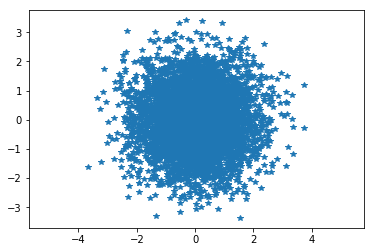

In [11]:
# first, set the expectations and covariance matrix
# assume that the correlation is zero in this example
ex = [0,0]
cov = [[1,0],[0,1]]

# second, generate random number for x and y 
# from the multivariate normal distribution
# '.T' is the transpose to facilitate plot

# np.random.multivariate_normal(expectation array, covariance matrix, size)
x, y = np.random.multivariate_normal(ex, cov, 5000).T

# finally, obtain the scatter plot (a good way to show correlation)
# '*' denotes the shape of scatter points
# 'equal' makes a balanced plot
plt.plot(x, y, '*')
plt.axis('equal')
plt.show()

Change the value of correlation.
What do you find?

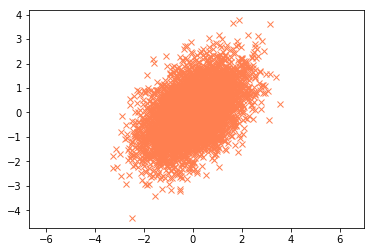

In [12]:
# first, set the expectations and covariance matrix
# assume that the correlation is 0.5 in this example
ex = [0,0]
cov = [[1,0.5],[0.5,1]]

# second, generate random number for x and y 
# from the multivariate normal distribution
# '.T' is the transpose to facilitate plot

# np.random.multivariate_normal(expectation array, covariance matrix, size)
x, y = np.random.multivariate_normal(ex, cov, 5000).T

# finally, obtain the scatter plot (a good way to show correlation)
# 'x' denotes the shape of scatter points
# 'equal' makes a balanced plot
plt.plot(x, y, 'x', color='coral')
plt.axis('equal')
plt.show()

# 2. Examples of Risky Assets

In this section, we apply Monte Carlo method to risky assets.



## 2.1 Example: Two Risky Assets with $\rho=0$

Assume these risky assets follow normal distribution.

We consider the portofolio of two risky assets, where the weights are $w_1$ and $w_2$, respectively.

The expected returns of these two risky assets are $E[r_1]$ and $E[r_2]$, respectively. 

The variance of returns are $\sigma^2_1$ and $\sigma^2_2$, respectively.

Hence, the expectation and variance of the return of portofolio are $$E[r_p]=w_1E[r_1]+w_2E[r_2]$$ and $$\sigma^2_p=w^2_1 \sigma^2_1 + 2 w_1 w_2 \rho \sigma_1 \sigma_2 + w^2_2 \sigma^2_2$$ respectively.

Notice that the correlation of two risky assets can be any $\rho \in [-1,1]$.

In this example, the correlation of these two risky assests is $\rho = 0$.

Let $E[r_1]=0.04$, $E[r_2]=0.08$, $\sigma^2_1=0.06$, $\sigma^2_2=0.1$.

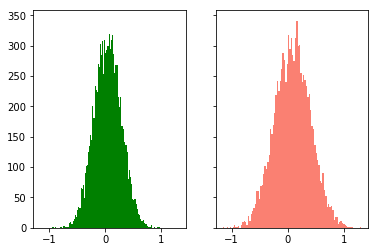

In [13]:
# For two risky assets
# first, generate random numbers
#     you can also generate random numbers separately 
#     since the correlation is zero in this example

ex = [0.04, 0.08]
cov = [[0.06,0], [0,0.1]]
size = 10000

x, y = np.random.multivariate_normal(ex, cov, size).T

# second, obtain the histogram of two random variables
# plt.subplots(number of row, number of column, 
#              sharey = if share the y-axis, sharex = if share the x-axis)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
ax1.hist(x, bins=100, color='green')
ax2.hist(y, bins=100, color='salmon')
plt.show()

### 2.1.1 Analytic Results

In the following example, we show how to generate the analytic results of expectations and standard deviations by formulas.

You can employ the formulas to a specific weight.

In [14]:
# For one specific portofolio of two risky assets
# first, set the weights of each asset
# you can change w1 as you like

weight = [0.5, 0.5]

# second, check the expectation and variance of the return for this portofolio
# Notice that the correlation here is just zero

ER = np.sum(ex * np.transpose(weight))
STD = np.sqrt(np.dot(np.transpose(weight), np.dot(cov, weight)))

# third, print the result

print('The expectation is ER = ', round(ER,2), '\n','The standard deviation is STD = ', round(STD,2))

The expectation is ER =  0.06 
 The standard deviation is STD =  0.2


You can also apply the formulas to multiple weights by the `for loop`.

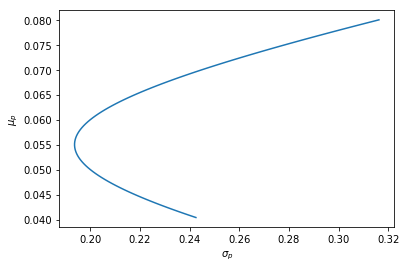

In [15]:
# For multiple weights, or combinations, of two risky assets in the portofolio
# We can use a for loop to generate all expectations and standard deviation

# set up array to store results
X = np.zeros((2, 100))

# for loop of different weights
for i in range(0, 100):
    # generate a weight
    weight = [i/100, 1-i/100]
    # compute expectation by formula
    X[1,i] = np.sum(ex * np.transpose(weight))
    # compute standard deviation by formula
    X[0,i] = np.sqrt(np.dot(np.transpose(weight), np.dot(cov, weight)))

# plot standard deviation and expectation 
plt.plot(X[0,:],X[1,:])
# label x-axis (you can use latex style)
plt.xlabel('$\sigma_p$')
# label y-axis (you can use latex style)
plt.ylabel('$\mu_p$')
plt.show()

### 2.1.2 Simulation Results

In the following example, we show how to generate simulation results by Monte Carlo method.

You don't have to apply formulas to compute the expectations and standard deviations. 

That's why we need Monte Carlo method: sometimes the formula is very complex or the analytic result even doesn't exist!

Notice that although every time you draw from the same underlying distribution, the empirical distribution may change because of the randomnness.

In [16]:
# For two risky assets and the returns are x and y
# first, set parameters

# parameters for random numbers
ex = [0.04, 0.08]
cov = [[0.06,0], [0,0.1]]
size = 10000

# parameter for loop
# L1 for loop on weight
L1 = 100
# L2 for loop on sampling
L2 = 10

In [17]:
# second, compute the empirical mean and variance 
#          by the x and y

# set up array to store results
# X1 for analytical results
X1 = np.zeros((2, L1))
# X2 for simulations
X2 = np.zeros((2, L1*L2))
# X3 for Monte Carlo results
X3 = np.zeros((2, L1))

# for loop of different weights
for i in range(0, L1):
    # generate a weight
    weight = i/L1
    # compute expectation by formula
    X1[1,i] = weight*ex[0] + (1-weight)*ex[1]
    # compute standard deviation by formula
    X1[0,i] = np.sqrt((weight**2)*cov[0][0] + ((1-weight)**2)*cov[1][1])

    # for each weight, get a new sample
    for j in range(0,L2):
        # draw samples from normal distribution
        x, y = np.random.multivariate_normal(ex, cov, size).T
        # generate the portoflio w.r.t weight
        ptf = weight*x + (1-weight)*y
        # compute the mean return
        X2[1,j+i*L2] = ptf.mean()
        # compute the std return
        X2[0,j+i*L2] = ptf.std()
    
    # calculate Monte Carlo results from simulation
    X3[1,i] = X2[1, i*L2 : (i+1)*L2].mean()
    X3[0,i] = X2[0, i*L2 : (i+1)*L2].mean()
        

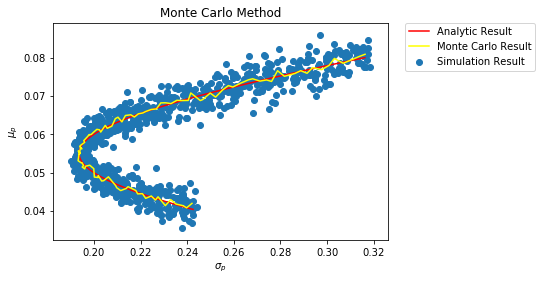

In [18]:
# Third, plot standard deviation and expectation 

# plot standard deviation and expectation 
plt.plot(X1[0,:],X1[1,:], color='red', label='Analytic Result')
plt.scatter(X2[0,:],X2[1,:], label='Simulation Result')
plt.plot(X3[0,:],X3[1,:], color='yellow', label='Monte Carlo Result')

# set the legend of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# label x-axis (you can use latex style)
plt.xlabel('$\sigma_p$')
# label y-axis (you can use latex style)
plt.ylabel('$\mu_p$')

# set the title of plot
plt.title('Monte Carlo Method')

plt.show()

## 2.2 Example: Three Risky Assests with $\rho \neq 0$

In this example, the correlation of these three risky assests (stocks) is nonzero.

We use the real world financial data in this example.

In [19]:
# fetch data from website

# list of stocks in portfolio
stocks = ['AAPL','MSFT','GOOGL']
 
# download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks, data_source='yahoo', start='01/01/2015')['Adj Close']

In [20]:
# generate returns of stock prices

# convert daily stock prices into daily returns
returns = data.pct_change()
 
# calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [21]:
mean_daily_returns

AAPL    -0.000458
GOOGL   -0.000806
MSFT    -0.000747
dtype: float64

In [22]:
# Notice that the correlation between stocks is not zero.
cov_matrix

,AAPL,GOOGL,MSFT
AAPL,0.000213,0.000087,0.000104
GOOGL,0.000087,0.000190,0.000115
MSFT,0.000104,0.000115,0.000202


In [23]:
# set up for portfolio

# set number of runs of random portfolio weights
num_portfolios = 1000
 
# set up array to hold results
results = np.zeros((2,num_portfolios))

In [24]:
# explore different portfolios by for loop
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(3)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
 
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
 
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev

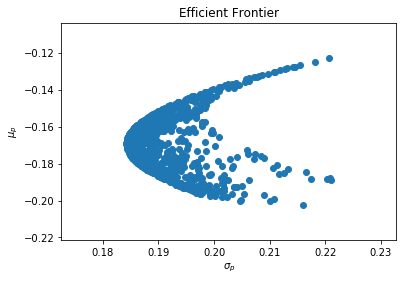

In [25]:
# convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev'])
 
# create scatter plot 
plt.scatter(results_frame.stdev,results_frame.ret)
plt.xlabel('$\sigma_p$')
plt.ylabel('$\mu_p$')
plt.title('Efficient Frontier')
plt.show()